### Importing Libraries, Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import zipfile

# Pandas display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


Data Description File

In [3]:
zf = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Lending_Club/archive.zip') 
data_info = pd.read_excel(zf.open('LCDataDictionary.xlsx'), index_col=0)
data_info.head()

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan application
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by the borrower during registration.


In [4]:
data_info.index

Index([           'acc_now_delinq',      'acc_open_past_24mths',                'addr_state',                  'all_util',                'annual_inc',          'annual_inc_joint',          'application_type',               'avg_cur_bal',            'bc_open_to_buy',                   'bc_util',
       ...
             'disbursement_method',      'debt_settlement_flag', 'debt_settlement_flag_date',         'settlement_status',           'settlement_date',         'settlement_amount',     'settlement_percentage',           'settlement_term',                         nan,                         nan], dtype='object', name='LoanStatNew', length=153)

In [6]:
data_info.loc['revol_util']['Description']

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [7]:
feat_info('annual_inc')

The self-reported annual income provided by the borrower during registration.


In [8]:
feat_info('funded_amnt')

The total amount committed to that loan at that point in time.


Creating a Scanning DF for examining dataset, before working on it, reading first 10 K rows

In [9]:
zf = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Lending_Club/archive.zip') 
df_scan = pd.read_csv(zf.open('Loan_status_2007-2020Q3.gzip'), nrows=10000, low_memory=False)
df_scan.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0,Jan-1985,735,739,1,NaN,NaN,3,0,13648,83.7%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704,700,0,NaN,1,Individual,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.00,0,Apr-1999,740,744,5,NaN,NaN,3,0,1687,9.4%,4,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499,0,0,NaN,1,Individual,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.72,0,Nov-2001,735,739,2,NaN,NaN,2,0,2956,98.5%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun

In [10]:
df_scan.shape

(10000, 142)

In [11]:
df_scan.issue_d.value_counts()

Dec-2011    2267
Nov-2011    2232
Oct-2011    2118
Sep-2011    2067
Aug-2011    1316
Name: issue_d, dtype: int64

In [12]:
df_scan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 142 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   Unnamed: 0                                  int64  
 1   id                                          int64  
 2   loan_amnt                                   int64  
 3   funded_amnt                                 int64  
 4   funded_amnt_inv                             float64
 5   term                                        object 
 6   int_rate                                    object 
 7   installment                                 float64
 8   grade                                       object 
 9   sub_grade                                   object 
 10  emp_title                                   object 
 11  emp_length                                  object 
 12  home_ownership                              object 
 13  annual_inc                     

In [13]:
df_scan.loan_status.value_counts()

Fully Paid     8429
Charged Off    1571
Name: loan_status, dtype: int64

In [14]:
df_scan['Fully_Paid'] = df_scan.loan_status.map({'Fully Paid':1,'Charged Off':0})

In [15]:
df_scan.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,Fully_Paid
0,0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0,Jan-1985,735,739,1,NaN,NaN,3,0,13648,83.7%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704,700,0,NaN,1,Individual,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1
1,1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.00,0,Apr-1999,740,744,5,NaN,NaN,3,0,1687,9.4%,4,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499,0,0,NaN,1,Individual,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0
2,2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.72,0,Nov-2001,735,739,2,NaN,NaN,2,0,2956,98.5%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.

In [16]:
df_scan.corr()['Fully_Paid'].sort_values(ascending=False)

Fully_Paid                                    1.000000
last_fico_range_high                          0.464634
last_fico_range_low                           0.424083
total_rec_prncp                               0.349409
last_pymnt_amnt                               0.244953
total_pymnt_inv                               0.233729
total_pymnt                                   0.233243
fico_range_low                                0.145938
fico_range_high                               0.145938
annual_inc                                    0.068966
Unnamed: 0                                    0.036852
total_acc                                     0.023284
revol_bal                                     0.009374
open_acc                                      0.006175
mths_since_last_delinq                       -0.006358
total_rec_int                                -0.010236
delinq_2yrs                                  -0.025272
mths_since_last_record                       -0.026285
installmen

**Feature Selection**

In [17]:
selected_feat=['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership',
                   'annual_inc','verification_status','issue_d','purpose','title','dti','earliest_cr_line','inq_last_6mths',
                   'open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','application_type','mort_acc',
                   'last_pymnt_amnt',
                    'pub_rec_bankruptcies','addr_state','fico_range_low','fico_range_high','loan_status']

In [18]:
len(selected_feat)

31

In [19]:
selected_feat=sorted(selected_feat)

In [20]:
data_info.loc[selected_feat]

,Description
LoanStatNew,
addr_state,The state provided by the borrower in the loan application
annual_inc,The self-reported annual income provided by the borrower during registration.
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
earliest_cr_line,The month the borrower's earliest reported credit line was opened
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
emp_title,The job title supplied by the Borrower when applying for the loan.*
fico_range_high,The upper boundary range the borrower’s FICO at loan origination belongs to.
fico_range_low,The lower boundary range the borrower’s FICO at loan origination belongs to.


Reading Dataset

In [23]:
zf = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Lending_Club/archive.zip') 
df = pd.read_csv(zf.open('Loan_status_2007-2020Q3.gzip'), usecols=selected_feat)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_pymnt_amnt,application_type,mort_acc,pub_rec_bankruptcies
0,5000.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,Computer,AZ,27.65,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,171.62,Individual,NaN,0.0
1,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,bike,GA,1.00,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,119.66,Individual,NaN,0.0
2,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,small_business,real estate business,IL,8.72,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,649.91,Individual,NaN,0.0
3,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,personel,CA,20.00,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,357.48,Individual,NaN,0.0
4,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Fully Paid,other,Personal,OR,17.94,Jan-1996,695.0,699.0,0.0,15.0,0.0,27783.0,53.9%,38.0,f,67.30,Individual,NaN,0.0


### Exploratory Data Analysis

In [24]:
df.shape

(2925493, 31)

In [25]:
df[df.issue_d=='Aug-2007'].shape

(74, 31)

In [26]:
df.groupby('issue_d')['loan_status'].value_counts().head(100)

issue_d   loan_status                                        
Apr-2008  Fully Paid                                               128
          Does not meet the credit policy. Status:Fully Paid        68
          Does not meet the credit policy. Status:Charged Off       36
          Charged Off                                               27
Apr-2009  Fully Paid                                               250
          Charged Off                                               40
          Does not meet the credit policy. Status:Fully Paid        34
          Does not meet the credit policy. Status:Charged Off        9
Apr-2010  Fully Paid                                               745
          Charged Off                                               82
          Does not meet the credit policy. Status:Fully Paid        66
          Does not meet the credit policy. Status:Charged Off       19
Apr-2011  Fully Paid                                              1341
          Charg

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Data columns (total 31 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   term                  object 
 2   int_rate              object 
 3   installment           float64
 4   grade                 object 
 5   sub_grade             object 
 6   emp_title             object 
 7   emp_length            object 
 8   home_ownership        object 
 9   annual_inc            float64
 10  verification_status   object 
 11  issue_d               object 
 12  loan_status           object 
 13  purpose               object 
 14  title                 object 
 15  addr_state            object 
 16  dti                   float64
 17  earliest_cr_line      object 
 18  fico_range_low        float64
 19  fico_range_high       float64
 20  inq_last_6mths        float64
 21  open_acc              float64
 22  pub_rec               float64
 23  revol_b

In [29]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'last_pymnt_amnt', 'application_type', 'mort_acc', 'pub_rec_bankruptcies'], dtype='object')

**Checking for Missing Values**

In [30]:
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

emp_title               9.03
emp_length              7.01
mort_acc                1.71
title                   0.80
dti                     0.11
revol_util              0.09
pub_rec_bankruptcies    0.05
installment             0.00
grade                   0.00
sub_grade               0.00
loan_status             0.00
int_rate                0.00
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
term                    0.00
addr_state              0.00
purpose                 0.00
earliest_cr_line        0.00
fico_range_low          0.00
fico_range_high         0.00
inq_last_6mths          0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
total_acc               0.00
initial_list_status     0.00
last_pymnt_amnt         0.00
application_type        0.00
loan_amnt               0.00
dtype: float64

In [ ]:
feat_info('loan_status')

Current status of the loan


In [ ]:
feat_info('addr_state')

The state provided by the borrower in the loan application


**Describe Numerical Features**

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2925492.0,15358.775105,9478.383451,500.00,8000.00,13000.00,20000.0000,4.000000e+04
installment,2925492.0,452.391358,272.947849,4.93,253.50,382.30,603.9200,1.719830e+03
annual_inc,2925488.0,79937.274015,111747.608711,0.00,47000.00,66000.00,95000.0000,1.100000e+08
dti,2922384.0,19.296480,15.719773,-1.00,12.08,18.10,24.8800,9.990000e+02
fico_range_low,2925492.0,700.511030,33.765652,610.00,675.00,695.00,720.0000,8.450000e+02
fico_range_high,2925492.0,704.511235,33.766533,614.00,679.00,699.00,724.0000,8.500000e+02
inq_last_6mths,2925462.0,0.554213,0.859975,0.00,0.00,0.00,1.0000,3.300000e+01
open_acc,2925463.0,11.676163,5.733312,0.00,8.00,11.00,15.0000,1.040000e+02
pub_rec,2925463.0,0.176285,0.524376,0.00,0.00,0.00,0.0000,8.600000e+01
revol_bal,2925492.0,16964.840934,22996.213652,0.00,5993.00,11493.00,20644.0000,2.904836e+06


**Target Column Value Distribution**

In [33]:
df.loan_status.value_counts()

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: loan_status, dtype: int64

Text(0.5, 1.0, 'Loan Status Value Distribution')

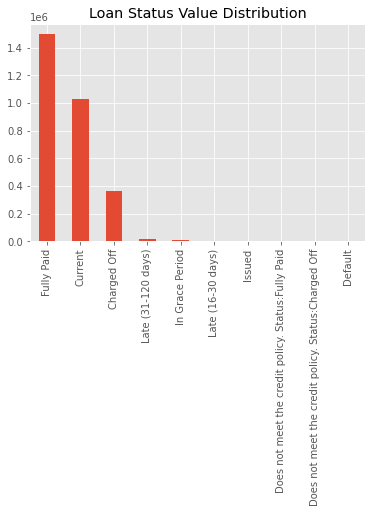

In [36]:
df.loan_status.value_counts().plot.bar()
plt.title('Loan Status Value Distribution')

Selecting Fully Paid and Charged Off Rows  
More than 1 million Current loans, we can't use them, we don't know yet the output

In [37]:
df = df.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [38]:
df.shape

(1860331, 31)

In [39]:
print(df.loan_status.value_counts(),'\n')
print(df.loan_status.value_counts(normalize=True))

Fully Paid     1497783
Charged Off     362548
Name: loan_status, dtype: int64 

Fully Paid     0.805116
Charged Off    0.194884
Name: loan_status, dtype: float64


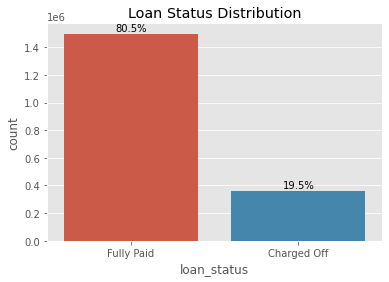

In [40]:
ax=sns.countplot(x='loan_status',data=df)
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title('Loan Status Distribution')
plt.show()

In [41]:
df['Fully_Paid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df.drop('loan_status', axis=1, inplace=True)

Text(0.5, 1.0, 'Loan Amount Distribution')

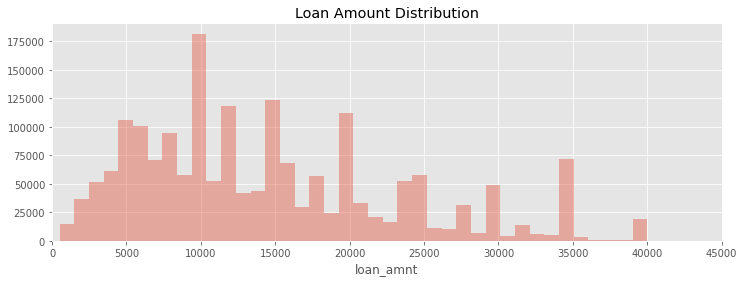

In [43]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)
plt.title('Loan Amount Distribution')

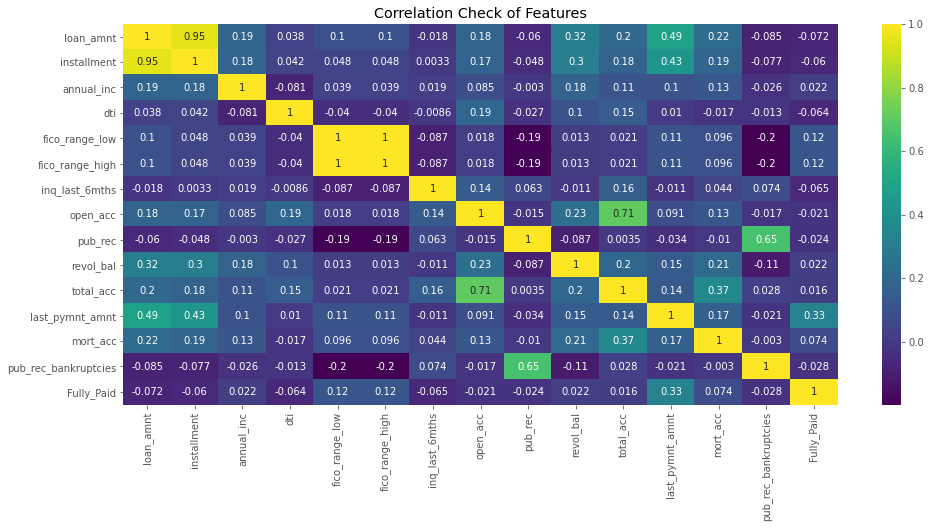

In [44]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Correlation Check of Features');

loan_amount and installment are highly correlated. Since 
loan_amount has higher correlation, it will be kept, installment will be dropped

Similarly between Total acc and open acc, total acc will be dropped

Between pub rec and pub rec bankruptcies, pub rec will be dropped

Fico Range High and Low fully correlated, will create a new feature instead of both

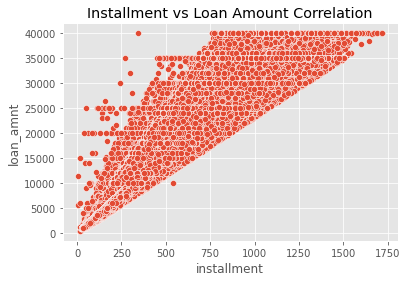

In [45]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)
plt.title('Installment vs Loan Amount Correlation');

In [46]:
df.drop(['installment',
         'total_acc',
         'pub_rec',
         ],axis=1, inplace=True)

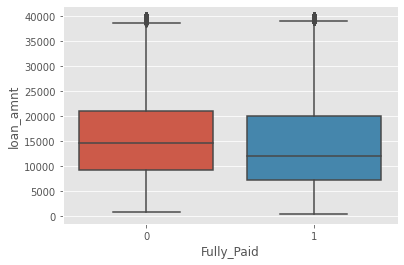

In [47]:
sns.boxplot(x='Fully_Paid',y='loan_amnt',data=df)

In [48]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

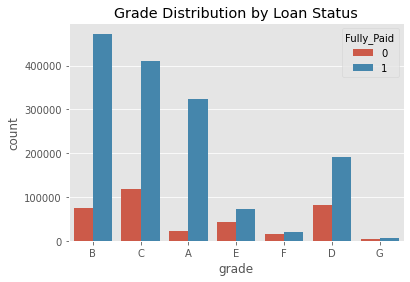

In [49]:
sns.countplot(x='grade',data=df,hue='Fully_Paid')
plt.title('Grade Distribution by Loan Status');

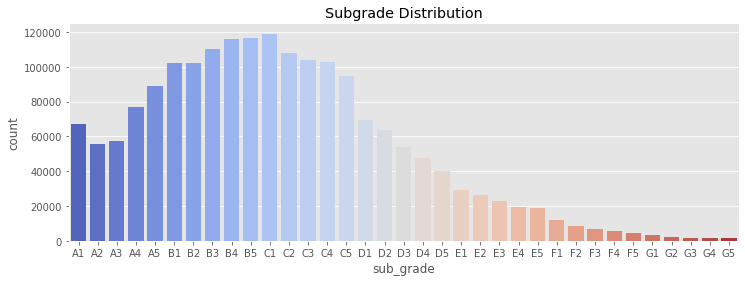

In [51]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm')
plt.title('Subgrade Distribution');

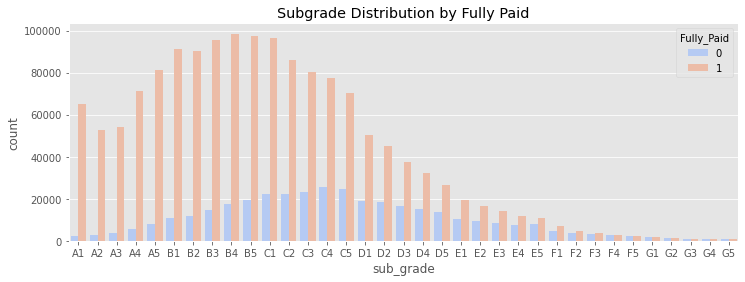

In [52]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm', hue='Fully_Paid' )
plt.title('Subgrade Distribution by Fully Paid');

**Subgrade includes necessary info, dropping grade**

In [ ]:
df.drop('grade',axis=1, inplace=True)

### Data Cleaning

In [53]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               7.066162
emp_length              6.299739
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   1.150655
addr_state              0.000000
dti                     0.059559
earliest_cr_line        0.000000
fico_range_low          0.000000
fico_range_high         0.000000
inq_last_6mths          0.000054
open_acc                0.000000
revol_bal               0.000000
revol_util              0.075148
initial_list_status     0.000000
last_pymnt_amnt         0.000000
application_type        0.000000
mort_acc                2.541537
pub_rec_bankruptcies    0.037466
Fully_Paid              0.000000
dtype: float64

Very low percentage missing values, so we can drop some of them

In [54]:
df.shape

(1860331, 28)

In [55]:
df.emp_title.value_counts()

Teacher                 30748
Manager                 27960
Owner                   15903
Registered Nurse        12592
RN                      12098
                        ...  
ConvaTec Inc.               1
Iron worker Forman          1
Full time dispatcher        1
Cal-E-View Farm             1
Dallas Market Center        1
Name: emp_title, Length: 456676, dtype: int64

Employment Title various, not a significant factor, needs time for data cleaning

In [56]:
df.drop('emp_title',axis=1, inplace=True)

In [57]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [58]:
emp_length_order = ['< 1 year','1 year',
  '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years','10+ years']

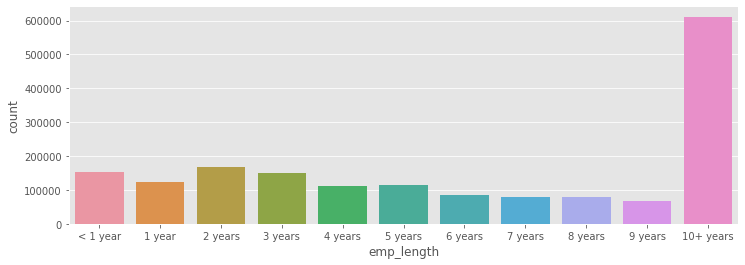

In [59]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

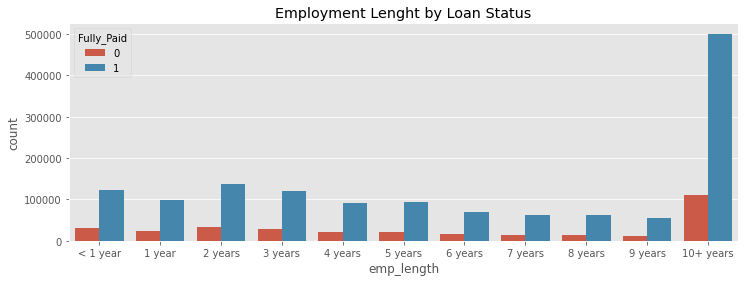

In [62]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='Fully_Paid')
plt.title('Employment Lenght by Loan Status');

In [63]:
emp_co = df[df['Fully_Paid']==1].groupby("emp_length").count()['Fully_Paid']
emp_fp = df[df['Fully_Paid']==0].groupby("emp_length").count()['Fully_Paid']

In [64]:
emp_co

emp_length
1 year        98242
10+ years    500547
2 years      136090
3 years      120099
4 years       90307
5 years       93472
6 years       69263
7 years       63290
8 years       63498
9 years       54476
< 1 year     122026
Name: Fully_Paid, dtype: int64

In [65]:
emp_fp

emp_length
1 year        24682
10+ years    110783
2 years       32426
3 years       29172
4 years       21904
5 years       22400
6 years       16091
7 years       14851
8 years       15148
9 years       12694
< 1 year      31674
Name: Fully_Paid, dtype: int64

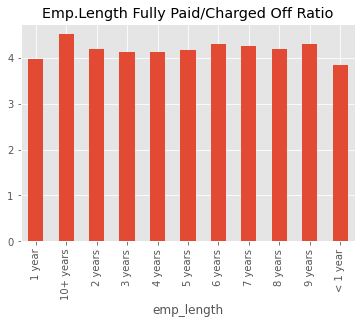

In [68]:
(emp_co/emp_fp).plot(kind='bar')
plt.title('Emp.Length Fully Paid/Charged Off Ratio');

No significant change in years for target 

In [69]:
df = df.drop('emp_length',axis=1)

In [70]:
df.isnull().sum()/len(df)

loan_amnt               0.000000e+00
term                    0.000000e+00
int_rate                0.000000e+00
grade                   0.000000e+00
sub_grade               0.000000e+00
home_ownership          0.000000e+00
annual_inc              0.000000e+00
verification_status     0.000000e+00
issue_d                 0.000000e+00
purpose                 0.000000e+00
title                   1.150655e-02
addr_state              0.000000e+00
dti                     5.955929e-04
earliest_cr_line        0.000000e+00
fico_range_low          0.000000e+00
fico_range_high         0.000000e+00
inq_last_6mths          5.375387e-07
open_acc                0.000000e+00
revol_bal               0.000000e+00
revol_util              7.514792e-04
initial_list_status     0.000000e+00
last_pymnt_amnt         0.000000e+00
application_type        0.000000e+00
mort_acc                2.541537e-02
pub_rec_bankruptcies    3.746645e-04
Fully_Paid              0.000000e+00
dtype: float64

Dropping Missing Values

In [71]:
df.dropna(inplace=True)

In [72]:
df.isnull().sum().sum()

0

In [73]:
feat_info('title')

The loan title provided by the borrower


In [74]:
df['title'].value_counts()

Debt consolidation                        939555
Credit card refinancing                   366042
Home improvement                          110849
Other                                     101936
Major purchase                             36207
                                           ...  
BOA-Free                                       1
C.C REFINCE                                    1
Last of the Debt                               1
Complete Consolidation of Credit Loans         1
College Loan                                   1
Name: title, Length: 44031, dtype: int64

In [75]:
df['purpose'].value_counts()

debt_consolidation    1026416
credit_card            400859
home_improvement       119059
other                  108063
major_purchase          38921
medical                 21511
car                     18245
small_business          18076
vacation                12731
moving                  12428
house                   10538
wedding                  1253
renewable_energy         1130
educational                 2
Name: purpose, dtype: int64

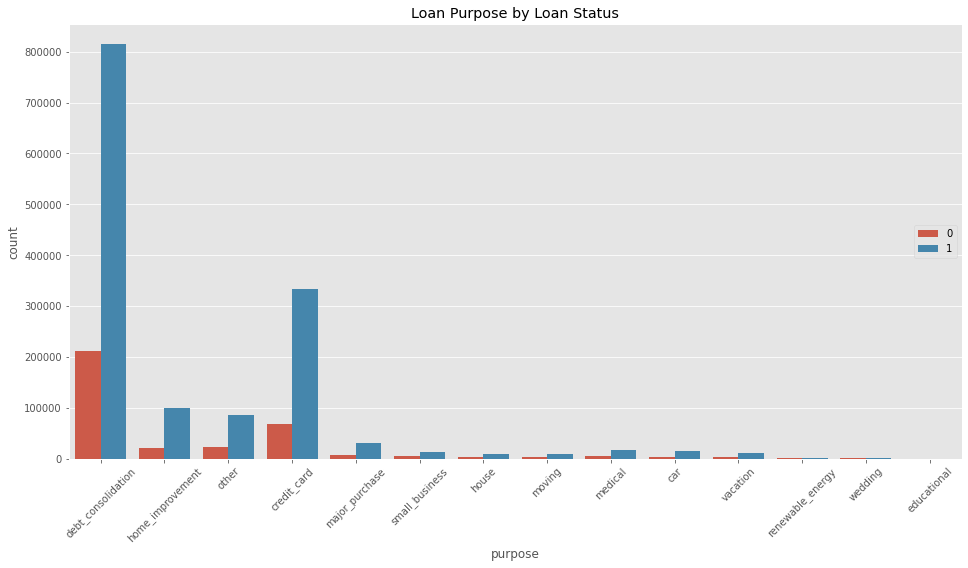

In [82]:
plt.figure(figsize=(16,8))
sns.countplot(x='purpose', data=df, hue='Fully_Paid')
plt.xticks(rotation=45)
plt.legend(loc=5)
plt.title('Loan Purpose by Loan Status');

Title and purpose similar features, dropping title

In [83]:
df.drop('title',axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789232 entries, 42536 to 2925492
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   term                  object 
 2   int_rate              object 
 3   sub_grade             object 
 4   home_ownership        object 
 5   annual_inc            float64
 6   verification_status   object 
 7   issue_d               object 
 8   purpose               object 
 9   addr_state            object 
 10  dti                   float64
 11  earliest_cr_line      object 
 12  fico_range_low        float64
 13  fico_range_high       float64
 14  inq_last_6mths        float64
 15  open_acc              float64
 16  revol_bal             float64
 17  revol_util            object 
 18  initial_list_status   object 
 19  last_pymnt_amnt       float64
 20  application_type      object 
 21  mort_acc              float64
 22  pub_rec_bankruptcies  float64
 23  Ful

In [84]:
df.shape

(1789232, 25)

In [85]:
df.select_dtypes(['object']).columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'application_type'], dtype='object')

In [86]:
df['term'].value_counts()

 36 months    1340421
 60 months     448811
Name: term, dtype: int64

Taking only numerical part of term feature

In [87]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [ ]:
df.head()

,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,initial_list_status,last_pymnt_amnt,application_type,mort_acc,pub_rec_bankruptcies,Fully_Paid
42536,12000.0,36,10.99%,B2,RENT,60000.0,Not Verified,Dec-2013,debt_consolidation,NC,4.62,Dec-2009,720.0,724.0,1.0,15.0,7137.0,24%,f,3775.55,Individual,0.0,0.0,1
42537,4800.0,36,10.99%,B2,MORTGAGE,39600.0,Source Verified,Dec-2013,home_improvement,TX,2.49,Aug-1995,755.0,759.0,2.0,3.0,4136.0,16.1%,w,3900.48,Individual,0.0,0.0,1
42538,27050.0,36,10.99%,B2,OWN,55000.0,Verified,Dec-2013,debt_consolidation,MI,22.87,Oct-1986,730.0,734.0,0.0,14.0,36638.0,61.2%,w,6074.19,Individual,4.0,0.0,1
42539,12000.0,36,7.62%,A3,MORTGAGE,96500.0,Not Verified,Dec-2013,debt_consolidation,TX,12.61,Sep-2003,705.0,709.0,0.0,17.0,13248.0,55.7%,f,2927.22,Individual,1.0,0.0,1
42540,14000.0,36,12.85%,B4,RENT,88000.0,Not Verified,Dec-2013,debt_consolidation,NC,10.02,Jun-1988,670.0,674.0,0.0,6.0,3686.0,81.9%,f,470.47,Individual,0.0,1.0,1


Taking only year of Earliest Credit Year Column

In [88]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df.drop('earliest_cr_line',axis=1,inplace=True)

In [89]:
df.earliest_cr_year.dtype

dtype('int64')

Taking only year of Issue Date Column

In [90]:
df['issue_d'] = df['issue_d'].apply(lambda date:int(date[-4:]))

Text(0, 0.5, 'Average loan amount issued')

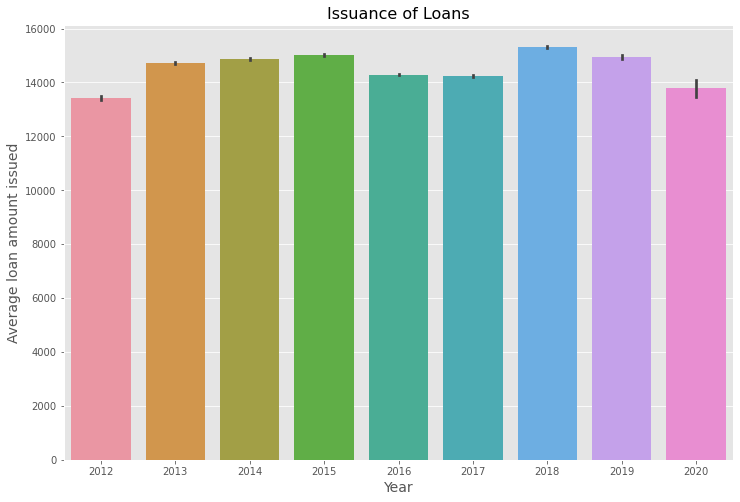

In [91]:
plt.figure(figsize=(12,8))
sns.barplot(x='issue_d', y='loan_amnt', data=df)
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

In [92]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,initial_list_status,last_pymnt_amnt,application_type,mort_acc,pub_rec_bankruptcies,Fully_Paid,earliest_cr_year
42536,12000.0,36,10.99%,B,B2,RENT,60000.0,Not Verified,2013,debt_consolidation,NC,4.62,720.0,724.0,1.0,15.0,7137.0,24%,f,3775.55,Individual,0.0,0.0,1,2009
42537,4800.0,36,10.99%,B,B2,MORTGAGE,39600.0,Source Verified,2013,home_improvement,TX,2.49,755.0,759.0,2.0,3.0,4136.0,16.1%,w,3900.48,Individual,0.0,0.0,1,1995
42538,27050.0,36,10.99%,B,B2,OWN,55000.0,Verified,2013,debt_consolidation,MI,22.87,730.0,734.0,0.0,14.0,36638.0,61.2%,w,6074.19,Individual,4.0,0.0,1,1986
42539,12000.0,36,7.62%,A,A3,MORTGAGE,96500.0,Not Verified,2013,debt_consolidation,TX,12.61,705.0,709.0,0.0,17.0,13248.0,55.7%,f,2927.22,Individual,1.0,0.0,1,2003
42540,14000.0,36,12.85%,B,B4,RENT,88000.0,Not Verified,2013,debt_consolidation,NC,10.02,670.0,674.0,0.0,6.0,3686.0,81.9%,f,470.47,Individual,0.0,1.0,1,1988


Removing Percentage symbol from related columns

In [93]:
df['int_rate'] = df['int_rate'].apply(lambda x: float(x[:-1]))
df['revol_util'] = df['revol_util'].apply(lambda x: float(x[:-1]))

In [94]:
df.application_type.value_counts()

Individual    1721743
Joint App       67489
Name: application_type, dtype: int64

In [95]:
df.addr_state.value_counts()

CA    252725
TX    147819
NY    143981
FL    128425
IL     69880
NJ     63910
PA     60178
OH     58878
GA     58175
NC     50379
VA     49722
MI     47115
AZ     43927
MD     41799
MA     40673
CO     39144
WA     38435
MN     31855
IN     30284
TN     28673
MO     28559
CT     26904
NV     26865
WI     23999
AL     21964
OR     21735
SC     21625
LA     20257
KY     17287
OK     16393
KS     14939
AR     13588
UT     13001
MS      9743
NM      9661
NH      8736
HI      8708
RI      7876
WV      6306
NE      5899
MT      5092
DE      5053
DC      4264
AK      4187
WY      3838
VT      3763
SD      3650
ME      3518
ID      3234
ND      2609
IA         2
Name: addr_state, dtype: int64

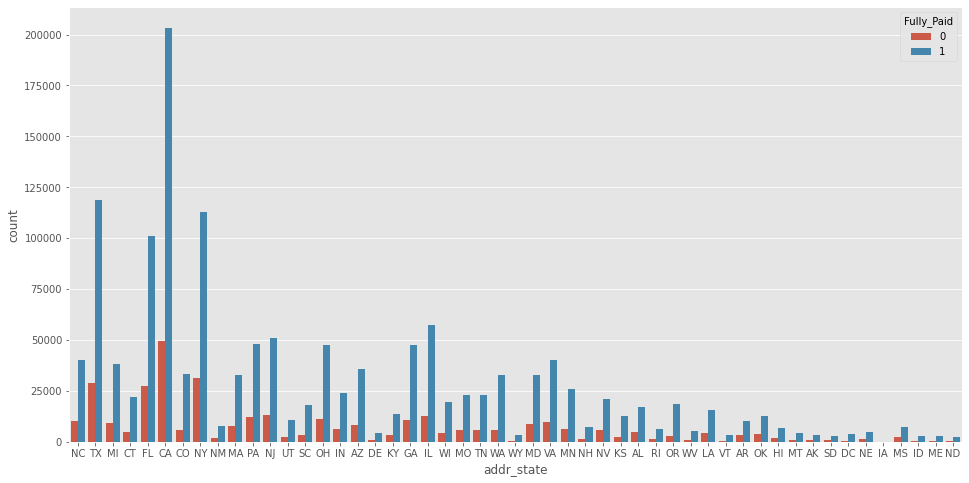

In [96]:
plt.figure(figsize=(16,8))
sns.countplot(x='addr_state', data=df, hue='Fully_Paid')

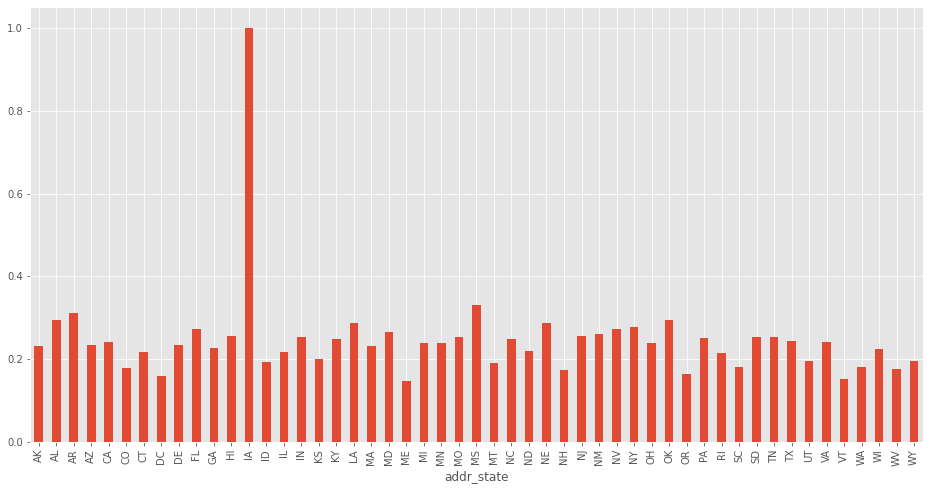

In [97]:
state_co = df[df['Fully_Paid']==1].groupby("addr_state").count()['Fully_Paid']
state_fp = df[df['Fully_Paid']==0].groupby("addr_state").count()['Fully_Paid']
plt.figure(figsize=(16,8))
(state_fp/state_co).plot(kind='bar')

Anomaly in Iowa, let's focus on it

In [98]:
df[df.addr_state=='IA']['Fully_Paid'].value_counts()

1    1
0    1
Name: Fully_Paid, dtype: int64

There are only two cases, that's why portion is high. Other States are more or less similar. We can drop that feature

In [99]:
df.drop('addr_state', axis=1, inplace=True)

In [100]:
feat_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


In [101]:
df.initial_list_status.value_counts()

w    1176446
f     612786
Name: initial_list_status, dtype: int64

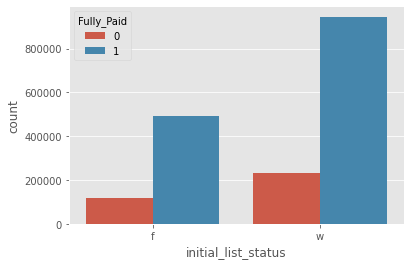

In [102]:
sns.countplot(x='initial_list_status', data=df, hue='Fully_Paid')

Feature Engineering

In [103]:
df['home_ownership'].value_counts()

MORTGAGE    886017
RENT        702695
OWN         199256
ANY           1173
NONE            46
OTHER           45
Name: home_ownership, dtype: int64

Combining none, any and other categories with rent

In [104]:
df['home_ownership'].replace(['NONE', 'ANY','OTHER'], 'RENT', inplace=True)

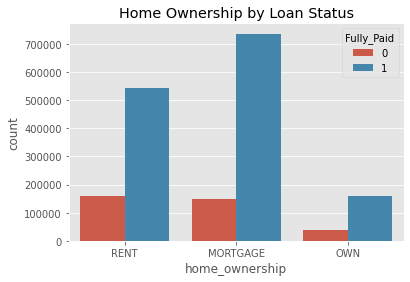

In [107]:
sns.countplot(x='home_ownership', data=df, hue='Fully_Paid')
plt.title('Home Ownership by Loan Status');

In [108]:
df.verification_status.value_counts()

Source Verified    711853
Not Verified       562748
Verified           514631
Name: verification_status, dtype: int64

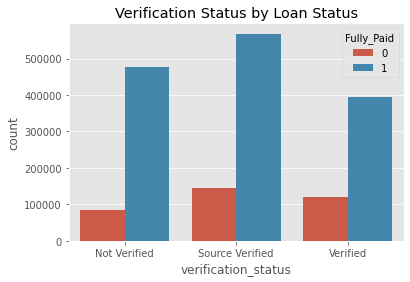

In [110]:
sns.countplot(x='verification_status', data=df, hue='Fully_Paid')
plt.title('Verification Status by Loan Status');

In [111]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,initial_list_status,last_pymnt_amnt,application_type,mort_acc,pub_rec_bankruptcies,Fully_Paid,earliest_cr_year
42536,12000.0,36,10.99,B,B2,RENT,60000.0,Not Verified,2013,debt_consolidation,4.62,720.0,724.0,1.0,15.0,7137.0,24.0,f,3775.55,Individual,0.0,0.0,1,2009
42537,4800.0,36,10.99,B,B2,MORTGAGE,39600.0,Source Verified,2013,home_improvement,2.49,755.0,759.0,2.0,3.0,4136.0,16.1,w,3900.48,Individual,0.0,0.0,1,1995
42538,27050.0,36,10.99,B,B2,OWN,55000.0,Verified,2013,debt_consolidation,22.87,730.0,734.0,0.0,14.0,36638.0,61.2,w,6074.19,Individual,4.0,0.0,1,1986
42539,12000.0,36,7.62,A,A3,MORTGAGE,96500.0,Not Verified,2013,debt_consolidation,12.61,705.0,709.0,0.0,17.0,13248.0,55.7,f,2927.22,Individual,1.0,0.0,1,2003
42540,14000.0,36,12.85,B,B4,RENT,88000.0,Not Verified,2013,debt_consolidation,10.02,670.0,674.0,0.0,6.0,3686.0,81.9,f,470.47,Individual,0.0,1.0,1,1988


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789232 entries, 42536 to 2925492
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   term                  int64  
 2   int_rate              float64
 3   grade                 object 
 4   sub_grade             object 
 5   home_ownership        object 
 6   annual_inc            float64
 7   verification_status   object 
 8   issue_d               int64  
 9   purpose               object 
 10  dti                   float64
 11  fico_range_low        float64
 12  fico_range_high       float64
 13  inq_last_6mths        float64
 14  open_acc              float64
 15  revol_bal             float64
 16  revol_util            float64
 17  initial_list_status   object 
 18  last_pymnt_amnt       float64
 19  application_type      object 
 20  mort_acc              float64
 21  pub_rec_bankruptcies  float64
 22  Fully_Paid            int64  
 23  ear

Feature Engineering, Creating Fico Range, using Fico range high and low

In [113]:
df['fico_range'] = (df.fico_range_high+df.fico_range_low)/2
df.drop(['fico_range_low','fico_range_high'], axis=1, inplace=True)

In [114]:
df.select_dtypes(['object']).columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type'], dtype='object')

**One Hot Encoding, changing categorical values into numeric**

In [115]:
df=pd.get_dummies(df, drop_first=True)

In [116]:
df.shape

(1789232, 75)

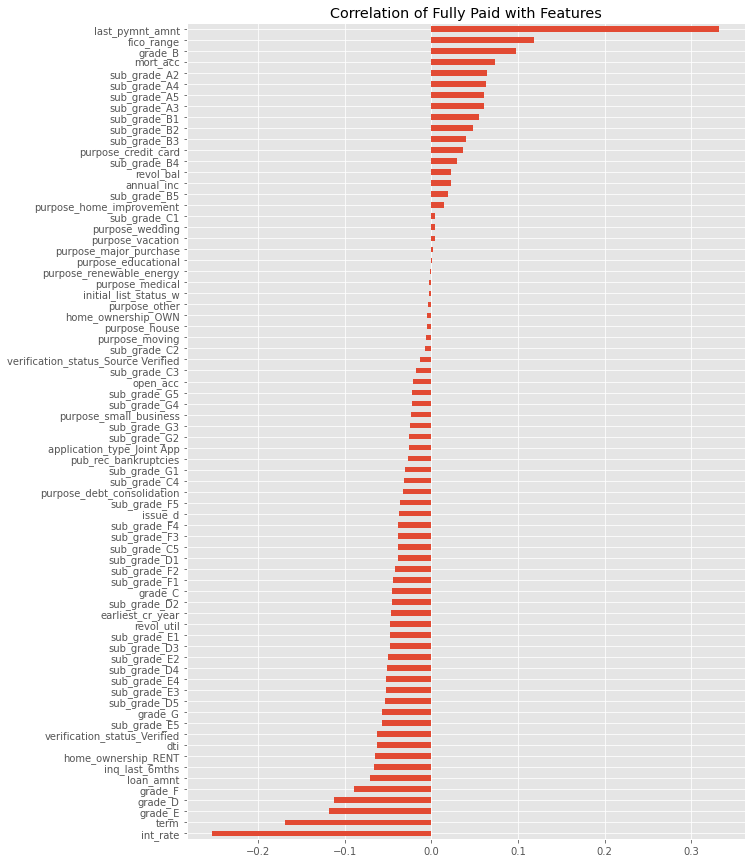

In [117]:
plt.figure(figsize=(10,15))
df.corr().Fully_Paid.sort_values()[:-1].plot.barh()
plt.title('Correlation of Fully Paid with Features');

In [118]:
df.sample(10)

,loan_amnt,term,int_rate,annual_inc,issue_d,dti,inq_last_6mths,open_acc,revol_bal,revol_util,last_pymnt_amnt,mort_acc,pub_rec_bankruptcies,Fully_Paid,earliest_cr_year,fico_range,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App
2393624,15000.0,36,11.99,62000.0,2016,35.98,0.0,13.0,14016.0,53.3,4788.77,1.0,0.0,1,2004,717.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2844222,30000.0,36,7.21,95000.0,2017,14.65,0.0,13.0,10092.0,23.7,23287.53,2.0,0.0,1,2005,772.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1508314,12000.0,36,9.49,72000.0,2014,20.83,0.0,13.0,43199.0,45.6,6165.08,4.0,0.0,1,2003,697.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2719238,19200.0,36,24.49,68000.0,2016,27.62,1.0,27.0,24271.0,47.5,18085.31,4.0,0.0,1,1986,667.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
572658,8000.0,36,10.91,48000.0,2018,5.30,0.0,4.0,1804.0,23.7,261.57,0.0,0.0,0,2014,742.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
434131,8000.0,36,9.93,85000.0,2017,15.29,1.0,17.0,12738.0,27.6,257.88,1.0,0.0,0,2008,682.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2494734,4575.0,36,20.75,21000.0,2016,18.57,0.0,4.0,3295.0,58.8,4700.62,0.0,0.0,1,2003,712.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2541140,8000.0,36,11.49,26400.0,2016,16.95,1.0,16.0,5914.0,31.6,5307.69,0.0,0.0,1,2004,717.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1497361,27575.0,36,13.66,130000.0,2014,21.38,0.0,11.0,38120.0,74.2,1869.79,0.0,0.0,1,1991,697.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
65047,9500.0,36,11.99,30160.0,2013,18.54,0.0,14.0,8242.0,50.9,315.09,0.0,0.0,1,2000,667.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [119]:
df.shape

(1789232, 75)

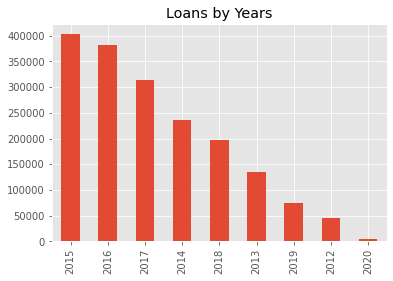

In [122]:
df.issue_d.value_counts().plot.bar()
plt.title('Loans by Years');

In [123]:
df.loc[df.issue_d.isin([2020, 2019, 2018])]

,loan_amnt,term,int_rate,annual_inc,issue_d,dti,inq_last_6mths,open_acc,revol_bal,revol_util,last_pymnt_amnt,mort_acc,pub_rec_bankruptcies,Fully_Paid,earliest_cr_year,fico_range,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App
472066,14100.0,36,23.87,128000.0,2018,14.12,0.0,12.0,11150.0,62.6,10759.27,3.0,0.0,1,2005,662.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
472067,20000.0,60,14.07,92000.0,2018,11.40,0.0,12.0,20176.0,46.2,466.10,0.0,0.0,0,2002,692.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
472072,7000.0,36,11.98,40000.0,2018,20.25,0.0,13.0,5004.0,36.0,5364.25,0.0,0.0,1,2007,697.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
472079,21000.0,60,20.39,85000.0,2018,15.76,0.0,15.0,14591.0,34.2,183.26,3.0,0.0,1,2008,667.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
472080,40000.0,60,9.43,150000.0,2018,4.09,0.0,6.0,4373.0,9.4,20264.30,0.0,1.0,1,1996,732.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867555,3500.0,36,10.81,173000.0,2020,2.39,0.0,12.0,1693.0,6.6,3450.03,3.0,0.0,1,2006,792.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1867557,2500.0,36,18.24,55858.0,2020,34.79,2.0,10.0,8589.0,46.4,2520.61,5.0,1.0,1,2004,682.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1867599,8000.0,36,10.19,116000.0,2020,15.35,1.0,13.0,6293.0,35.6,7939.83,2.0,0.0,1,2000,722.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1867684,2500.0,36,14.71,31000.0,2020,28.46,0.0,14.0,7460.0,16.3,2548.68,0.0,0.0,1,1991,707.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


**Down Sampling for model testing, Selecting most recent 3 years**

In [124]:
df_sample=df.loc[df.issue_d.isin([2020, 2019, 2018])]
# df_sample=pd.concat([df_sample[df_sample.Fully_Paid==1].sample(50000),df_sample[df_sample.Fully_Paid==0].sample(50000)], ignore_index=True)

In [125]:
df_sample.shape

(275573, 75)

In [126]:
list(df_sample.columns)

['loan_amnt',
 'term',
 'int_rate',
 'annual_inc',
 'issue_d',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'revol_util',
 'last_pymnt_amnt',
 'mort_acc',
 'pub_rec_bankruptcies',
 'Fully_Paid',
 'earliest_cr_year',
 'fico_range',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 'sub_grade_F5',
 'sub_grade_G1',
 'sub_grade_G2',
 'sub_grade_G3',
 'sub_grade_G4',
 'sub_grade_G5',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Source Verified',
 'verification_status_

In [127]:
print(df_sample.Fully_Paid.value_counts(),'\n')
print(df_sample.Fully_Paid.value_counts(normalize=True))

1    215125
0     60448
Name: Fully_Paid, dtype: int64 

1    0.780646
0    0.219354
Name: Fully_Paid, dtype: float64


Data Pre-Processing

In [128]:
X = df_sample.drop('Fully_Paid',axis=1)
y = df_sample['Fully_Paid']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y,random_state=42)

In [129]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(220458, 74)
(55115, 74)
(220458,)
(55115,)


### Model Building, Testing Different Models

Random Forest Classifier

In [130]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier().fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[11151   939]
 [ 1497 41528]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12090
           1       0.98      0.97      0.97     43025

    accuracy                           0.96     55115
   macro avg       0.93      0.94      0.94     55115
weighted avg       0.96      0.96      0.96     55115



In [ ]:
rf_clf.feature_importances_

array([5.43613086e-02, 1.13536171e-02, 4.34525796e-02, 2.71503541e-02,
       6.31459528e-03, 2.88751033e-02, 7.78367155e-03, 2.06650248e-02,
       2.84409189e-02, 2.79358755e-02, 6.34789138e-01, 1.25498147e-02,
       3.23512748e-03, 2.33010573e-03, 1.95267675e-03, 1.84421843e-03,
       1.23329846e-03, 1.17397503e-03, 1.22420356e-03, 1.01208828e-03,
       1.36340608e-03, 1.39292297e-03, 1.29329858e-03, 1.25050520e-03,
       1.28751123e-03, 1.25661443e-03, 1.28272749e-03, 1.11708614e-03,
       1.26879405e-03, 1.19599452e-03, 1.03150377e-03, 9.86099868e-04,
       5.03109646e-04, 4.38428980e-04, 5.57003976e-04, 4.48754034e-04,
       6.41721055e-04, 2.05935648e-04, 9.92004826e-05, 7.84954614e-05,
       6.28220519e-05, 7.15161845e-05, 9.51361106e-05, 3.51029823e-05,
       1.03875002e-05, 1.92533187e-06, 3.36343063e-06, 2.75833938e-03,
       5.02260244e-03, 4.45302386e-03, 4.35831768e-03, 3.34961813e-03,
       4.26478131e-03, 0.00000000e+00, 1.92376847e-03, 7.57130160e-04,
      

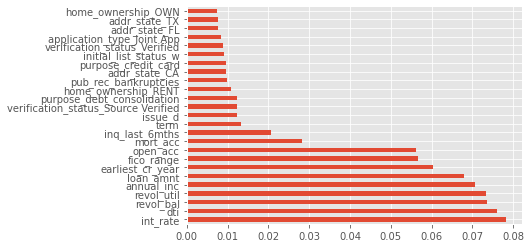

In [ ]:
(pd.Series(rf_clf.feature_importances_, index=X.columns).nlargest(25).plot(kind='barh')) 
plt.title('Random Forest Feature Importance')

Random Forest Tuning

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV, RandomizedSearchCV

# rf_params = {"n_estimators":[100,300,500],
#              "max_depth":[7,10,15],
#              "max_features": [8,10,15],
#              "min_samples_split": [4,6,8]}


# rf_grid= RandomizedSearchCV(rf_clf, rf_params, cv = 5,
#                              n_iter=10,
#                             n_jobs = -1, verbose = 2,scoring='f1').fit(X_train, y_train)

# rf_grid.best_params_

In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 15,             
                                  max_features = 10, 
                                  min_samples_split = 8, 
                                  n_estimators = 100).fit(X_train, y_train)


rf_tuned_pred = rf_tuned.predict(X_test)
print(confusion_matrix(y_test, rf_tuned_pred))
print(classification_report(y_test, rf_tuned_pred))

[[11173   917]
 [ 1409 41616]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     12090
           1       0.98      0.97      0.97     43025

    accuracy                           0.96     55115
   macro avg       0.93      0.95      0.94     55115
weighted avg       0.96      0.96      0.96     55115




XGBOOST Classifier

In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier().fit(X_train, y_train)
xgb_clf.score(X_test, y_test)
xgb_pred = xgb_clf.predict(X_test)
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

[[11650   440]
 [ 1703 41322]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     12090
           1       0.99      0.96      0.97     43025

    accuracy                           0.96     55115
   macro avg       0.93      0.96      0.95     55115
weighted avg       0.96      0.96      0.96     55115



XGBOOST Tuning

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
# xgb_params = {"n_estimators": [50, 100, 300],
#              "subsample":[0.5,0.8,1],
#              "max_depth":[3,5,7],
#              "learning_rate":[0.1,0.01,0.3]}
# xgb_cv_model = RandomizedSearchCV(xgb_clf, xgb_params, cv = 5,
#                             n_jobs = -1, verbose = 2).fit(X_train, y_train)
# xgb_cv_model.best_params_

In [ ]:
xgb_tuned = xgb.XGBClassifier(learning_rate= 0.01,
                                max_depth= 7,
                                n_estimators= 50,
                                subsample= 0.8).fit(X_train, y_train)
xgb_pred = xgb_tuned.predict(X_test)
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

[[11699   391]
 [ 1525 41500]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     12090
           1       0.99      0.96      0.98     43025

    accuracy                           0.97     55115
   macro avg       0.94      0.97      0.95     55115
weighted avg       0.97      0.97      0.97     55115



Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor="val_loss", verbose =2, mode="min", patience = 25, restore_best_weights=True)
model = Sequential()

# input layer
model.add(Dense(117,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(58, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(29, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1,activation='sigmoid'))
opt = Adam(lr = 0.01)
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=250,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop] 
          )

Epoch 1/250
862/862 [==============================] - 5s 4ms/step - loss: 0.3413 - accuracy: 0.8472 - val_loss: 0.1941 - val_accuracy: 0.9092
Epoch 2/250
862/862 [==============================] - 3s 4ms/step - loss: 0.1999 - accuracy: 0.9055 - val_loss: 0.1826 - val_accuracy: 0.9149
Epoch 3/250
862/862 [==============================] - 3s 4ms/step - loss: 0.1888 - accuracy: 0.9114 - val_loss: 0.1733 - val_accuracy: 0.9180
Epoch 4/250
862/862 [==============================] - 3s 4ms/step - loss: 0.1741 - accuracy: 0.9177 - val_loss: 0.1499 - val_accuracy: 0.9290
Epoch 5/250
862/862 [==============================] - 3s 4ms/step - loss: 0.1527 - accuracy: 0.9309 - val_loss: 0.1306 - val_accuracy: 0.9446
Epoch 6/250
862/862 [==============================] - 3s 4ms/step - loss: 0.1371 - accuracy: 0.9405 - val_loss: 0.1198 - val_accuracy: 0.9519
Epoch 7/250
862/862 [==============================] - 4s 4ms/step - loss: 0.1277 - accuracy: 0.9464 - val_loss: 0.1189 - val_accuracy: 0.9494

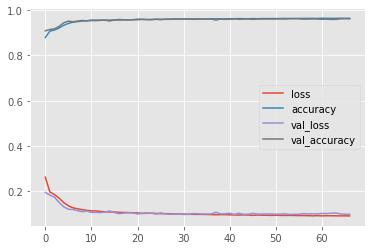

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict_classes(X_test)
#predictions = np.argmax(model.predict(X_test), axis=-1)
confusion_matrix(y_test,predictions)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     12090
           1       0.97      0.98      0.98     43025

    accuracy                           0.96     55115
   macro avg       0.95      0.94      0.94     55115
weighted avg       0.96      0.96      0.96     55115



LightGBM

In [ ]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(
            # nthread=4,
            # n_estimators=10000,
            # learning_rate=0.02,
            # num_leaves=32,
            # colsample_bytree=0.9497036,
            # subsample=0.8715623,
            # max_depth=8,
            # reg_alpha=0.04,
            # reg_lambda=0.073,
            # min_split_gain=0.0222415,
            # min_child_weight=40,
            # silent=-1,
            # verbose=-1,
            )
clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
            eval_metric= 'auc', verbose= 1000, early_stopping_rounds= 200)
clf_pred = clf.predict(X_test)
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

Training until validation scores don't improve for 200 rounds.
Did not meet early stopping. Best iteration is:
[97]	training's binary_logloss: 0.0743371	training's auc: 0.994996	valid_1's binary_logloss: 0.0935833	valid_1's auc: 0.992362
[[11641   449]
 [ 1215 41810]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     12090
           1       0.99      0.97      0.98     43025

    accuracy                           0.97     55115
   macro avg       0.95      0.97      0.96     55115
weighted avg       0.97      0.97      0.97     55115



In [ ]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=32,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.04,
            reg_lambda=0.073,
            min_split_gain=0.0222415,
            min_child_weight=40,
            silent=-1,
            verbose=-1,
            )
clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
            eval_metric= 'auc', verbose= 1000, early_stopping_rounds= 200)
clf_pred = clf.predict(X_test)
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

Training until validation scores don't improve for 200 rounds.
[1000]	training's binary_logloss: 0.0696832	training's auc: 0.995288	valid_1's binary_logloss: 0.0792954	valid_1's auc: 0.993324
[2000]	training's binary_logloss: 0.0630755	training's auc: 0.996246	valid_1's binary_logloss: 0.077594	valid_1's auc: 0.993545
Early stopping, best iteration is:
[1933]	training's binary_logloss: 0.0633612	training's auc: 0.996205	valid_1's binary_logloss: 0.0775899	valid_1's auc: 0.99356
[[11606   484]
 [ 1050 41975]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     12090
           1       0.99      0.98      0.98     43025

    accuracy                           0.97     55115
   macro avg       0.95      0.97      0.96     55115
weighted avg       0.97      0.97      0.97     55115



### Working with Whole Dataset

In [ ]:
df.shape

(1789232, 68)

In [ ]:
print(df.Fully_Paid.value_counts(),'\n')
print(df.Fully_Paid.value_counts(normalize=True))

1    1439516
0     349716
Name: Fully_Paid, dtype: int64 

1    0.804544
0    0.195456
Name: Fully_Paid, dtype: float64


### Selecting Most Recent Data for Validation Set, Whole Dataset

**XGBOOST Imbalanced Whole Dataset, Without Sampling**

In [132]:
df_sorted= df.sort_values('issue_d', ignore_index=True)
X = df_sorted.drop('Fully_Paid',axis=1)
y = df_sorted['Fully_Paid']

train_pct_index = int(0.8 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

#print(df_sorted.head(),'\n')
#print(df_sorted.tail(),'\n')

from collections import Counter

print('df shape     :{}'.format(df_sorted.shape))
print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape :{}'.format(X_test.shape))
print('y_test shape :{}\n'.format(y_test.shape))
print('Target Value Counts:\n{}\n'.format(Counter(y_train)))
print('Charged Off/Fully Paid ratio:{:.2f}\n'.format(Counter(y_train)[0]/Counter(y_train)[1]))



import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

xgb_clf = xgb.XGBClassifier().fit(X_train, y_train)
xgb_clf.score(X_test, y_test)
xgb_pred = xgb_clf.predict(X_test)
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

df shape     :(1789232, 75)
X_train shape:(1431385, 74)
y_train shape:(1431385,)
X_test shape :(357847, 74)
y_test shape :(357847,)

Target Value Counts:
Counter({1: 1161342, 0: 270043})

Charged Off/Fully Paid ratio:0.23

[[ 52386  27287]
 [  6758 271416]]
              precision    recall  f1-score   support

           0       0.89      0.66      0.75     79673
           1       0.91      0.98      0.94    278174

    accuracy                           0.90    357847
   macro avg       0.90      0.82      0.85    357847
weighted avg       0.90      0.90      0.90    357847



XGBOOST SMOTE Oversampling, Charged Off/Fully Paid 40% ratio

In [134]:
df_sorted= df.sort_values('issue_d', ignore_index=True)
X = df_sorted.drop('Fully_Paid',axis=1)
y = df_sorted['Fully_Paid']

train_pct_index = int(0.8 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

# print(df_sorted.head(),'\n')
# print(df_sorted.tail(),'\n')
 
from imblearn.over_sampling import SMOTE 
from collections import Counter

smt = SMOTE(sampling_strategy=0.4)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

print('df shape                  :{}'.format(df_sorted.shape))
print('X_train shape before SMOTE:{}'.format(X_train.shape))
print('y_train shape before SMOTE:{}'.format(y_train.shape))
print('X_test shape before SMOTE :{}'.format(X_test.shape))
print('y_test shape before SMOTE :{}\n'.format(y_test.shape))
print('Target Value Counts before SMOTE:\n{}\n'.format(Counter(y_train)))
print('Charged Off/Fully Paid ratio before SMOTE:{:.2f}\n'.format(Counter(y_train)[0]/Counter(y_train)[1]))
print('X_train shape after SMOTE:{}'.format(X_train_SMOTE.shape))
print('y_train shape after SMOTE:{}\n'.format(y_train_SMOTE.shape))
print('Target Value Counts after SMOTE:\n{}\n'.format(Counter(y_train_SMOTE)))
print('Charged Off/Fully Paid ratio after SMOTE:{:.2f}\n'.format(Counter(y_train_SMOTE)[0]/Counter(y_train_SMOTE)[1]))

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

xgb_clf = xgb.XGBClassifier().fit(X_train_SMOTE, y_train_SMOTE)
xgb_clf.score(X_test.values, y_test)
xgb_pred = xgb_clf.predict(X_test.values)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, xgb_pred),'\n')
print('Classification Report\n')
print(classification_report(y_test, xgb_pred))

df shape                  :(1789232, 75)
X_train shape before SMOTE:(1431385, 74)
y_train shape before SMOTE:(1431385,)
X_test shape before SMOTE :(357847, 74)
y_test shape before SMOTE :(357847,)

Target Value Counts before SMOTE:
Counter({1: 1161342, 0: 270043})

Charged Off/Fully Paid ratio before SMOTE:0.23

X_train shape after SMOTE:(1625878, 74)
y_train shape after SMOTE:(1625878,)

Target Value Counts after SMOTE:
Counter({1: 1161342, 0: 464536})

Charged Off/Fully Paid ratio after SMOTE:0.40

Confusion Matrix

[[ 48231  31442]
 [  9313 268861]] 

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.61      0.70     79673
           1       0.90      0.97      0.93    278174

    accuracy                           0.89    357847
   macro avg       0.87      0.79      0.82    357847
weighted avg       0.88      0.89      0.88    357847



XGBOOST SMOTE Oversampling, Charged Off/Fully Paid 1/1 ratio

In [136]:
df_sorted= df.sort_values('issue_d', ignore_index=True)
X = df_sorted.drop('Fully_Paid',axis=1)
y = df_sorted['Fully_Paid']

train_pct_index = int(0.8 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

# print(df_sorted.head(),'\n')
# print(df_sorted.tail(),'\n')

from imblearn.over_sampling import SMOTE 
from collections import Counter

smt = SMOTE()#sampling_strategy=0.4)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

print('df shape                  :{}'.format(df_sorted.shape))
print('X_train shape before SMOTE:{}'.format(X_train.shape))
print('y_train shape before SMOTE:{}'.format(y_train.shape))
print('X_test shape before SMOTE :{}'.format(X_test.shape))
print('y_test shape before SMOTE :{}\n'.format(y_test.shape))
print('Target Value Counts before SMOTE:\n{}\n'.format(Counter(y_train)))
print('Charged Off/Fully Paid ratio before SMOTE:{:.2f}\n'.format(Counter(y_train)[0]/Counter(y_train)[1]))
print('X_train shape after SMOTE:{}'.format(X_train_SMOTE.shape))
print('y_train shape after SMOTE:{}\n'.format(y_train_SMOTE.shape))
print('Target Value Counts after SMOTE:\n{}\n'.format(Counter(y_train_SMOTE)))
print('Charged Off/Fully Paid ratio after SMOTE:{:.2f}\n'.format(Counter(y_train_SMOTE)[0]/Counter(y_train_SMOTE)[1]))

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

xgb_clf = xgb.XGBClassifier().fit(X_train_SMOTE, y_train_SMOTE)
xgb_clf.score(X_test.values, y_test)
xgb_pred = xgb_clf.predict(X_test.values)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, xgb_pred),'\n')
print('Classification Report\n')
print(classification_report(y_test, xgb_pred))

df shape                  :(1789232, 75)
X_train shape before SMOTE:(1431385, 74)
y_train shape before SMOTE:(1431385,)
X_test shape before SMOTE :(357847, 74)
y_test shape before SMOTE :(357847,)

Target Value Counts before SMOTE:
Counter({1: 1161342, 0: 270043})

Charged Off/Fully Paid ratio before SMOTE:0.23

X_train shape after SMOTE:(2322684, 74)
y_train shape after SMOTE:(2322684,)

Target Value Counts after SMOTE:
Counter({1: 1161342, 0: 1161342})

Charged Off/Fully Paid ratio after SMOTE:1.00

Confusion Matrix

[[ 78906    767]
 [ 42239 235935]] 

Classification Report

              precision    recall  f1-score   support

           0       0.65      0.99      0.79     79673
           1       1.00      0.85      0.92    278174

    accuracy                           0.88    357847
   macro avg       0.82      0.92      0.85    357847
weighted avg       0.92      0.88      0.89    357847



**XGBOOST Undersampling**

In [ ]:
df_sample=pd.concat([df[df.Fully_Paid==1].sample(349716),df[df.Fully_Paid==0].sample(349716)], ignore_index=True)
df_sorted= df_sample.sort_values('issue_d', ignore_index=True)
X = df_sorted.drop('Fully_Paid',axis=1)
y = df_sorted['Fully_Paid']

train_pct_index = int(0.8 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

# print(df_sorted.head(),'\n')
# print(df_sorted.tail(),'\n')

print('df shape     :{}'.format(df_sorted.shape))
print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape :{}'.format(X_test.shape))
print('y_test shape :{}\n'.format(y_test.shape))
print('Target Value Counts:\n{}\n'.format(Counter(y_train)))
print('Charged Off/Fully Paid ratio:{:.2f}\n'.format(Counter(y_train)[0]/Counter(y_train)[1]))


import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
xgb_clf = xgb.XGBClassifier().fit(X_train, y_train)
xgb_clf.score(X_test, y_test)
xgb_pred = xgb_clf.predict(X_test)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, xgb_pred))
print('Classification Report\n')
print(classification_report(y_test, xgb_pred))

   loan_amnt  term  int_rate  annual_inc  issue_d   dti  inq_last_6mths  open_acc  revol_bal  revol_util  last_pymnt_amnt  mort_acc  pub_rec_bankruptcies  Fully_Paid  earliest_cr_year  fico_range  sub_grade_A2  sub_grade_A3  sub_grade_A4  sub_grade_A5  sub_grade_B1  sub_grade_B2  sub_grade_B3  sub_grade_B4  sub_grade_B5  sub_grade_C1  sub_grade_C2  sub_grade_C3  sub_grade_C4  sub_grade_C5  sub_grade_D1  sub_grade_D2  sub_grade_D3  sub_grade_D4  sub_grade_D5  sub_grade_E1  sub_grade_E2  sub_grade_E3  sub_grade_E4  sub_grade_E5  sub_grade_F1  sub_grade_F2  sub_grade_F3  sub_grade_F4  sub_grade_F5  sub_grade_G1  sub_grade_G2  sub_grade_G3  sub_grade_G4  sub_grade_G5  home_ownership_OWN  home_ownership_RENT  verification_status_Source Verified  verification_status_Verified  purpose_credit_card  purpose_debt_consolidation  purpose_educational  purpose_home_improvement  purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  purpose_sm

**LightGBM Tuned Undersampling**

In [137]:
df_sample=pd.concat([df[df.Fully_Paid==1].sample(349716),df[df.Fully_Paid==0].sample(349716)], ignore_index=True)
df_sorted= df_sample.sort_values('issue_d', ignore_index=True)
X = df_sorted.drop('Fully_Paid',axis=1)
y = df_sorted['Fully_Paid']

train_pct_index = int(0.8 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

# print(df_sorted.head(),'\n')
# print(df_sorted.tail(),'\n')

print('df shape     :{}'.format(df_sorted.shape))
print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape :{}'.format(X_test.shape))
print('y_test shape :{}\n'.format(y_test.shape))
print('Target Value Counts:\n{}\n'.format(Counter(y_train)))
print('Charged Off/Fully Paid ratio:{:.2f}\n'.format(Counter(y_train)[0]/Counter(y_train)[1]))


from lightgbm import LGBMClassifier
clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=32,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.04,
            reg_lambda=0.073,
            min_split_gain=0.0222415,
            min_child_weight=40,
            silent=-1,
            verbose=-1,
            )
clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
            eval_metric= 'auc', verbose= 1000, early_stopping_rounds= 200)
clf_pred = clf.predict(X_test)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, clf_pred))
print('Classification Report\n')
print(classification_report(y_test, clf_pred))

df shape     :(699432, 75)
X_train shape:(559545, 74)
y_train shape:(559545,)
X_test shape :(139887, 74)
y_test shape :(139887,)

Target Value Counts:
Counter({1: 286199, 0: 273346})

Charged Off/Fully Paid ratio:0.96

Training until validation scores don't improve for 200 rounds.
[1000]	training's auc: 0.942568	training's binary_logloss: 0.289689	valid_1's auc: 0.985529	valid_1's binary_logloss: 0.143775
[2000]	training's auc: 0.946036	training's binary_logloss: 0.282245	valid_1's auc: 0.986549	valid_1's binary_logloss: 0.139314
[3000]	training's auc: 0.948702	training's binary_logloss: 0.276557	valid_1's auc: 0.986936	valid_1's binary_logloss: 0.137072
[4000]	training's auc: 0.950782	training's binary_logloss: 0.27196	valid_1's auc: 0.987053	valid_1's binary_logloss: 0.136464
[5000]	training's auc: 0.952758	training's binary_logloss: 0.267554	valid_1's auc: 0.987224	valid_1's binary_logloss: 0.135439
Early stopping, best iteration is:
[5666]	training's auc: 0.953894	training's binary

AttributeError: ignored

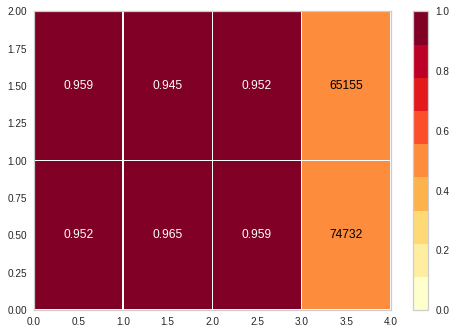

In [ ]:
from yellowbrick.classifier import ClassificationReport



# Specify the target classes
classes = [0,1]

# Instantiate the classification model and visualizer
model = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=32,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.04,
            reg_lambda=0.073,
            min_split_gain=0.0222415,
            min_child_weight=40,
            silent=-1,
            verbose=-1,
            )
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test);        # Evaluate the model on the test data
# visualizer.show()                       # Finalize and show the figure

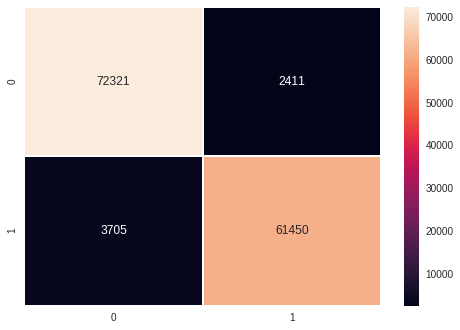

In [ ]:
cf_matrix = confusion_matrix(y_test, clf_pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')
plt.title('Confusion Matrix');

In [138]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'issue_d', 'dti', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'last_pymnt_amnt', 'mort_acc', 'pub_rec_bankruptcies', 'earliest_cr_year', 'fico_range', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'pu